# [Data Analysis Report] Semantics3 Proof of Concept

Author: Jeff Hara (slack @jeffhara)



In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!gsutil -m cp gs://dev_jeff/semantics3/*.csv ./

Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - beauty.csv...
Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - handmade.csv...
Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - home.csv...
Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - kids.csv...
Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - men.csv...
Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - sample.csv...
Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - other.csv...
Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - tech.csv...
Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - vintage.csv...
Copying gs://dev_jeff/semantics3/Mercari Annotated Results - July 16 2018 - sent - sports.csv...
Copying gs://dev_jeff/semantics3/Merc

In [3]:
ls | grep 'Mercari Annotated Results'

Mercari Annotated Results - July 16 2018 - sent - beauty.csv
Mercari Annotated Results - July 16 2018 - sent - handmade.csv
Mercari Annotated Results - July 16 2018 - sent - home.csv
Mercari Annotated Results - July 16 2018 - sent - kids.csv
Mercari Annotated Results - July 16 2018 - sent - men.csv
Mercari Annotated Results - July 16 2018 - sent - other.csv
Mercari Annotated Results - July 16 2018 - sent - sample.csv
Mercari Annotated Results - July 16 2018 - sent - sports.csv
Mercari Annotated Results - July 16 2018 - sent - tech.csv
Mercari Annotated Results - July 16 2018 - sent - vintage.csv
Mercari Annotated Results - July 16 2018 - sent - women.csv


Kai is doing Tech, Beauty, Other, Sports

In [4]:
import pandas as pd
import glob
import scipy.stats

### Notes

- some things I noticed looking at the Tech spreadsheet
- we often have NULL for brand (column 2), so I'm guessing that means that we couldn't figure out the brand of the item ourselves
- we have a lot of accessories that are incorrectly labeled as the product brand (Apple iPhone charger => Apple brand)
- confidence in the similarity score is not super useful in getting the brand name. many brands have similar products, so the products that are very similar (0.9+) does not translate to confidence in the brand matching.

Anecdotal findings
- Tekken 4 (PS 2) matched with (0.9973+) Tekken 7 (PS 4)

Empirical findings
- [x] how many brands did we match?
- [x] what is the distribution of their confidence scores? (cbrand_match_0, cbrand_match_1)
- [x] of the products that we matched, how did they respond?


In [5]:
def run_analysis(domain):
    filename = 'Mercari Annotated Results - July 16 2018 - sent - %s.csv' % domain
    df = pd.read_csv(filename)
    
    # Title of output
    print('Running analysis of \'%s\' category...' % domain)
    
    # how many brands did we match?
    percentage_brands_matched = df['brand'].count() / len(df.index) * 100
    
    # how many brands did they match? (only top match)
    percentage_brands_matched_0 = df['cbrand_0'].count() / len(df.index) * 100
    # how many brands did they match? (next top match)
    percentage_brands_matched_1 = df['cbrand_1'].count() / len(df.index) * 100
    
    df_match = pd.DataFrame({
        'user label': ['%0.1f%%' % percentage_brands_matched],
        'sem3 label': ['%0.1f%%' % np.mean([percentage_brands_matched_0,
                                            percentage_brands_matched_1
                                           ])]
    })
    
    print('Comparison of brand match-rates')
    print(df_match)
    
    # what is the distribution of their confidence scores?
    df_conf = pd.DataFrame(df, columns=['score_0',
                                        'score_1',
                                        'cbrand_match_0',
                                        'cbrand_match_1'
                                       ]).sort_values('score_0')
    
    y_conf = df_conf['score_0'].values, df_conf['score_1'].values
    x_conf = np.arange(len(y_conf[0]))
    
    y_match_mask = df_conf['cbrand_match_0'].values, df_conf['cbrand_match_1'].values
    x_match = x_conf[y_match_mask[0]], x_conf[y_match_mask[1]]
    y_match = y_conf[0][y_match_mask[0]], y_conf[1][y_match_mask[1]]

    plt.plot(x_conf, y_conf[0])
    plt.plot(x_match[0], y_match[0], 'bo', label='top match')
    plt.plot(x_conf, y_conf[1])
    plt.plot(x_match[1], y_match[1], 'go', label='next match')
    plt.title('similarity scoring distribution for %s' % domain)
    plt.legend()
    plt.show()
    
    # TODO: discrete bar graph
    # confidence = np.around(confidence[0], decimals=1), np.around(confidence[1], decimals=1)
    # disc_conf = scipy.stats.itemfreq(confidence[0]).T, scipy.stats.itemfreq(confidence[1]).T
    # print(disc_conf[0])
    
    # of the products that we matched, how did they respond?
    df_match = df.loc[df['brand'].notna()]
    df_match = pd.DataFrame(df_match, columns=['name',
                                               'brand',
                                               'cbrand_0',
                                               'score_0',
                                               'cbrand_1',
                                               'score_1'
                                              ])
    
    print()
    
    return df_match
    return df

Running analysis of 'tech' category...
Comparison of brand match-rates
  user label sem3 label
0      25.7%      71.1%


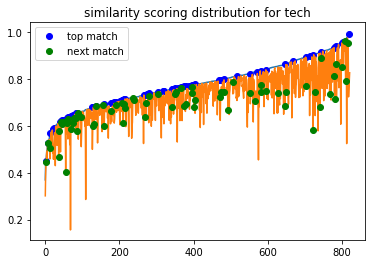

,name,brand,cbrand_0,score_0,cbrand_1,score_1
0,6ft iphone apple charger,Apple,iClever,0.998453,LAX Gadgets,0.825904
2,oem apple earphones,Apple,Apple,0.989522,OEM,0.754568
4,inuyasha season 4 box set,Viz Media,NaN,0.983255,Viz Media,0.950631
6,battlefield 1,Xbox,NaN,0.977042,Xbox One,0.974032
9,apple watch 42mm,Apple,Orzly,0.971363,Orzly,0.956507
10,gaming bundle,Sony,Insten,0.970172,Sony,0.788841
12,logitech webcam c200 w/ mic 1.3mp photos,Logitech,NaN,0.966053,Logitech,0.962237
13,iphone 5c unlock 16gb,Apple,Apple®,0.965690,Apple Cell Phones,0.961312
17,apple 12w usb power adapter charger,Apple,Apple,0.958303,APPLE,0.866296
18,xbox 360 jurassic park video game,Xbox,Warner Home Video Games,0.956171,Warner Home Video - Games,0.929755


In [6]:
run_analysis('tech')

Running analysis of 'beauty' category...
Comparison of brand match-rates
  user label sem3 label
0      34.5%      83.2%


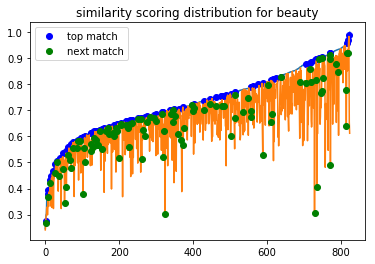


Running analysis of 'handmade' category...
Comparison of brand match-rates
  user label sem3 label
0       0.8%      70.2%


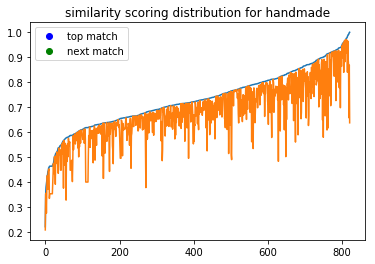


Running analysis of 'home' category...
Comparison of brand match-rates
  user label sem3 label
0      37.7%      73.8%


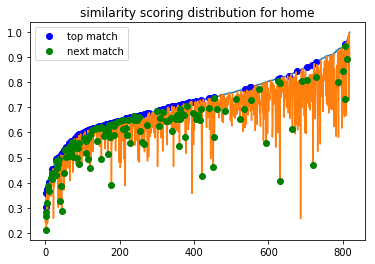


Running analysis of 'kids' category...
Comparison of brand match-rates
  user label sem3 label
0      48.9%      31.9%


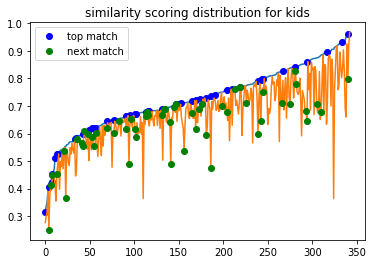


Running analysis of 'men' category...
Comparison of brand match-rates
  user label sem3 label
0      65.7%      18.9%


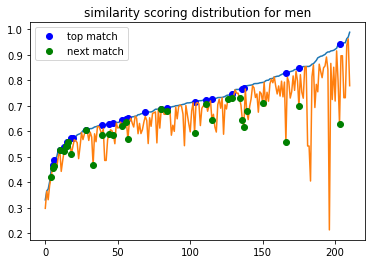


Running analysis of 'other' category...
Comparison of brand match-rates
  user label sem3 label
0      10.0%      66.0%


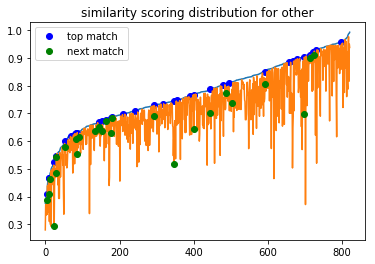


Running analysis of 'sample' category...
Comparison of brand match-rates
  user label sem3 label
0      59.6%      84.1%


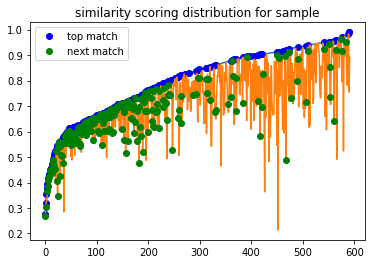


Running analysis of 'sports' category...
Comparison of brand match-rates
  user label sem3 label
0      27.2%      65.0%


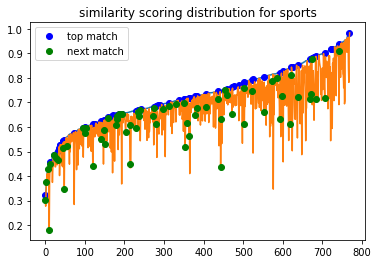


Running analysis of 'tech' category...
Comparison of brand match-rates
  user label sem3 label
0      25.7%      71.1%


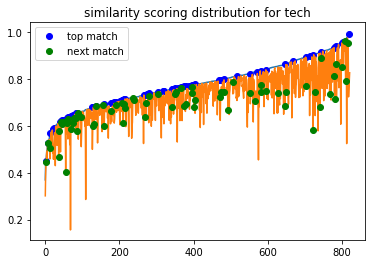


Running analysis of 'vintage' category...
Comparison of brand match-rates
  user label sem3 label
0      38.5%      71.4%


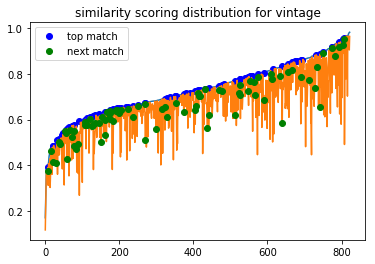


Running analysis of 'women' category...
Comparison of brand match-rates
  user label sem3 label
0      59.4%      22.9%


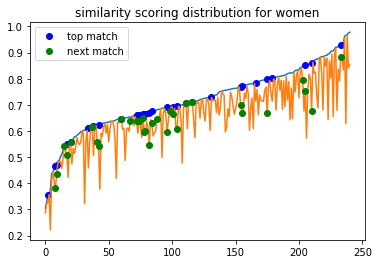

In [7]:
domains = ['beauty', 'handmade', 'home', 'kids', 'men',
           'other', 'sample', 'sports', 'tech', 'vintage', 'women']

for domain in domains:
    run_analysis(domain)

What I'm interested in here is figuring out what the similarity scoring is telling us. We want to know what is the threshold of a good match, and if everything above 0.8 matches the brand, for example, then 0.8 would be a good threshold.

Here, I have plotted a distribution of our matches ranked in order of similarity. Since we took the top two matches, the blue line is the top match and the orange is the next best match. These are sorted in order of the top match.

I included a table ```Comparison of brand match-rates```. As I understand it, we want to optimize our brand match-rates as a first step. To put it in another way, we can verify that the top results are 'right,' by some definition, if the brands match. This table shows whether or not the listing HAS a brand. The first column is the percentage of labelled listings, and the second and third columns show what percentage of Semantics3's matched listings are labelled. NOTE: this isn't an overall percentage, but just the ```2*N``` listings that we matched. 

I would interpret these results to mean that some of their categories are labelled poorly or well.

domain|user label|sem3 label|
------|----------|----------|
beauty| 34.5%    | **83.2%** |
handmade| 0.8%   | **70.2%** |
home| 37.7% | **73.8%** |
kids| **48.9%** |     31.9% |
men| **65.7%**     | 18.9% |
other|   10.0%   |   **66.0%** |
sample| 59.6%   |   **84.1%** |
sports|   27.2% |     **65.0%** |
tech| 25.7%   |   **71.1%** |
vintage|  38.5%  |    **71.4%** |
women|   **59.4%**   |    22.9%|

In [176]:
import re

def source_analysis(domain):
    filename = 'Mercari Annotated Results - July 16 2018 - sent - %s.csv' % domain
    df = pd.read_csv(filename)
    
    # Title of output
    print('Running source analysis of \'%s\' category...' % domain)
    
    urls = list(df['curl_0'].values) + list(df['curl_1'].values)
    
    sources = set()
    
    for url in urls:
        m = re.search(r'https?://(.*?)/.*', str(url))
        if m:
            sources.add(m[1])
    
    return sources

In [177]:
print(source_analysis('tech'))

Running source analysis of 'tech' category...
{'www.bonton.com', 'www.farfetch.com', 'www.anthropologie.com', 'store.apple.com', 'www.google.com', 'www.officemax.com', 'www.restockit.com', 'jet.com', 'www.lastcall.com', 'shop.nordstrom.com', 'www.datavis.com', 'www.shopbop.com', 'www.dicksmith.com.au', 'shop.davidjones.com.au', 'shop.popularmechanics.com', 'www.appliancesonline.com.au', 'us.bape.com', 'www.pacsun.com', 'www.amazon.co.uk', 'www.johnlewis.com', 'www.uspoloassn.com', 'www.pcrichard.com', 'www.snapdeal.com', 'www.zappos.com', 'www.wwbw.com', 'www.antonline.com', 'www.sears.com', 'www.sportsauthority.com', 'www.tillys.com', 'www.asos.com', 'www.nordstromrack.com', 'www.argos.co.uk', 'www.uncommongoods.com', 'www.threadsence.com', 'www.carters.com', 'en-ae.namshi.com', 'stagprovisions.com', 'www.fingerhut.com', 'www.samsclub.com', 'www.buydig.com', 'www.beachcamera.com', 'www.blueandcream.com', 'www.thehut.com', 'www.birchbox.com', 'www.belk.com', 'www.jcrew.com', 'www.toysr

In [180]:
sources = []
for domain in domains:
    sources += list(source_analysis(domain))
    sources = list(set(sources))
print(len(sources))

Running source analysis of 'beauty' category...
Running source analysis of 'handmade' category...
Running source analysis of 'home' category...
Running source analysis of 'kids' category...
Running source analysis of 'men' category...
Running source analysis of 'other' category...
Running source analysis of 'sample' category...
Running source analysis of 'sports' category...
Running source analysis of 'tech' category...
Running source analysis of 'vintage' category...
Running source analysis of 'women' category...
498
